# Part 3A : Hurricane Florence
**What is JSON?** Use the internet to find an answer.
> JSON (JavaScript Object Notation) is a text-based format for storing and exchanging structured data. It represents data using key-value pairs (like "name" : "Anisha") and arrays (like [1, 2, 3]).  Programmers use it for transferring data between systems, especially in APIs.


In [2]:
# reimport for simplicity
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

country = gpd.read_file('gz_2010_us_040_00_5m.json')
country.head()

ModuleNotFoundError: No module named 'geopandas'

<Axes: >

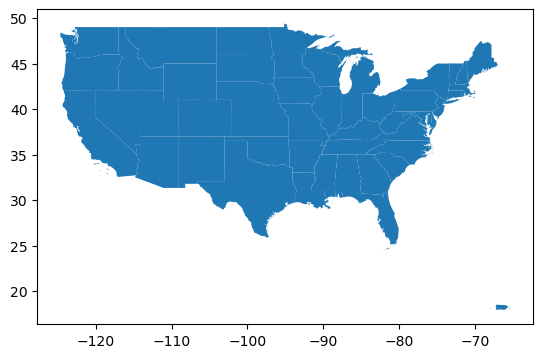

In [ ]:
country = country[(country['NAME'] != 'Alaska') & (country['NAME'] != 'Hawaii')]
country.plot()

<Axes: >

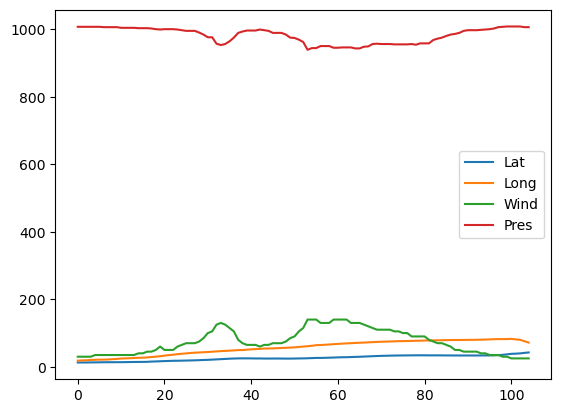

In [ ]:
# create a Pandas DataFrame and plot the location over time
florence = pd.read_csv('stormhistory.csv')
florence.plot()

# Part 3B : Adding a column
**Re-write the code in the cell below**, but do it without using a comprehension and no zip. Use a for-loop and the `.loc` method to get the data. Print out some stuff to convince yourself that they are identical!
```python
# your rewrite goes here

```

> Note that the -long is required because Longitude WEST is represented with negative
> values, and the data in stormhistory omits the negative value.

In [ ]:
from shapely.geometry import Point

# Empty column
florence['coordinates'] = None

# Loop through each row by index
for i in range(len(florence)):
    long_val = florence.loc[i, 'Long'] # Reads the Long value at row i
    lat_val = florence.loc[i, 'Lat'] # Reads the Lat value at row i.
    # Multiply longitude by -1 because data removes the negative sign
    florence.loc[i, 'coordinates'] = Point(-long_val, lat_val) # adds in new point in florence

# Print first few rows to verify
print(florence[['Long', 'Lat', 'coordinates']].head())

# Part 3C : Plot the path
Using the florence geodataframe and the figure provided in the code below, **plot the US and the hurricane's path** on the same axis. Get the figure to look like the one presented in the slidedeck.  

Recall that the US map is in the country identifier (of type geodataframe) which has already been filtered down to just the US.   
Hints:  
* change the size of the plot using the named parameter 'markersize'
* set the color of the plots using the named parameter 'color'

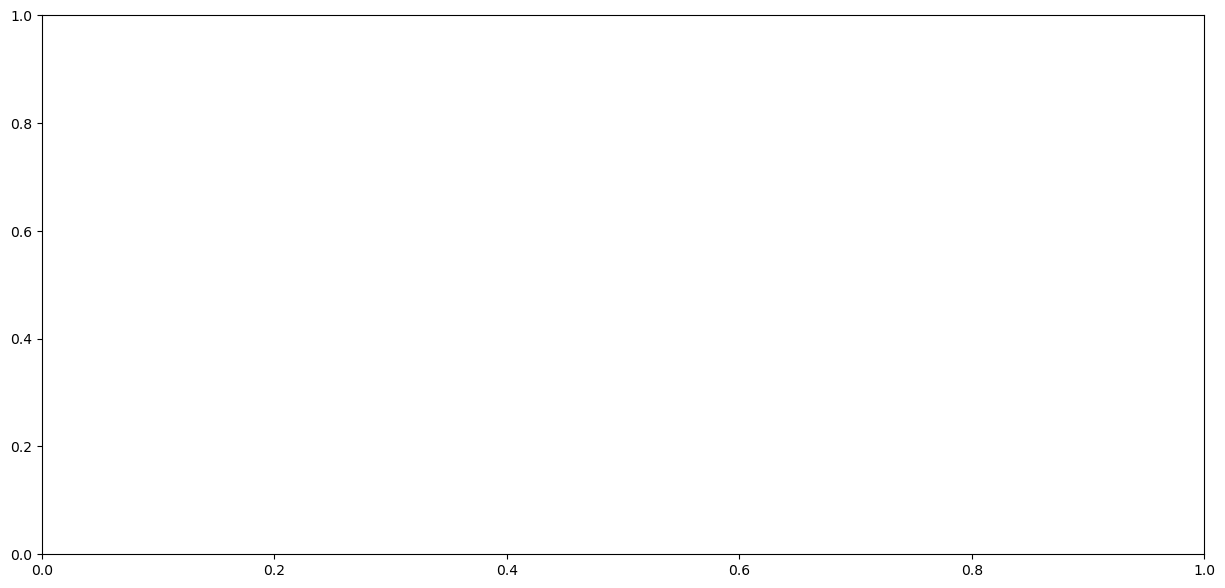

In [ ]:
florence = gpd.GeoDataFrame(florence, geometry='coordinates')
fig, ax = plt.subplots(1, figsize=(15, 7))

# Plot the map
country.plot(ax=ax, color='lightgray')

# Plot hurricane path with wind velocity coloring
florence.plot(ax=ax,column='Wind',cmap='viridis',markersize=50,legend=True,legend_kwds={'label': "Wind Velocity", 'orientation': "horizontal"})

# Titles and labels
ax.set_title('Hurricane Florence Path with Wind Velocity')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


### Quite the Challenge

![Challenge](challenge.PNG)

Can you get the following?

* Add the Wind velocity into the map by using the velocity to color the points. 
    * _HINT_: Use the named argument 'column' (not 'color')
    * _HINT_: Use the named argument 'cmap' to set the [theme](https://matplotlib.org/stable/tutorials/colors/colormaps.html) of the color
* Add a legend to show wind velocity values, position it under the graph, and label it Wind.
    * _HINT_: Use the named argument 'legend_kwds' and see the arguments for [colorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html#matplotlib.pyplot.colorbar) to know what key/value pairs are available.